In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
X = pd.read_csv('spotify_data.csv')

In [3]:
X.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
X = X.filter(['duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target', 'acousticness', 'danceability'], axis = 1)

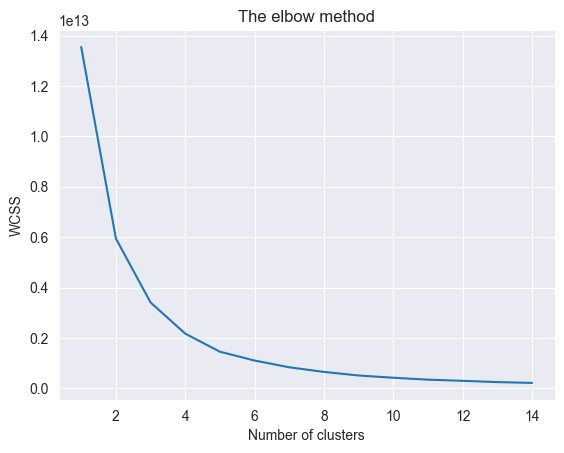

In [5]:
wcss = []

for i in range (1, 15):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range (1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<Axes: xlabel='energy', ylabel='acousticness'>

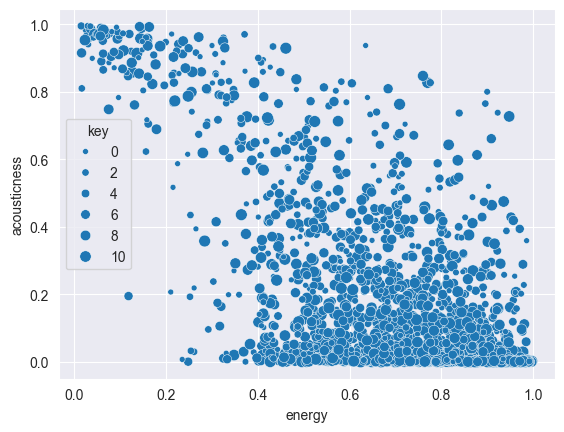

In [7]:
sns.scatterplot(data = X, x="energy", y = "acousticness", size="key")

In [8]:
model = KMeans(n_clusters= 5)
model.fit(X)

KMeans(n_clusters=5)

In [9]:
print(model.cluster_centers_)

[[ 1.78205752e+05  7.08513423e-01  9.13256319e-02  5.14932886e+00
   1.88590436e-01 -6.43886745e+00  6.35906040e-01  1.01784396e-01
   1.23504656e+02  3.97483221e+00  5.46512416e-01  4.56375839e-01
   1.94671811e-01  6.19447987e-01]
 [ 4.17375752e+05  5.91532000e-01  4.22979181e-01  5.64800000e+00
   1.63500000e-01 -1.04253280e+01  5.28000000e-01  6.84432000e-02
   1.17892904e+02  3.96800000e+00  4.57762400e-01  7.60000000e-01
   2.54354390e-01  6.56000000e-01]
 [ 3.00637181e+05  6.61178010e-01  2.02648688e-01  5.68848168e+00
   1.99154450e-01 -7.76960995e+00  5.75916230e-01  9.29725131e-02
   1.20281704e+02  3.94502618e+00  4.56863089e-01  6.02094241e-01
   1.77374073e-01  6.17756545e-01]
 [ 6.56582615e+05  5.96361538e-01  3.90602581e-01  4.61538462e+00
   2.87357692e-01 -1.08815000e+01  4.61538462e-01  6.28961538e-02
   1.07958962e+02  3.92307692e+00  4.47061538e-01  7.30769231e-01
   3.51931923e-01  5.45038462e-01]
 [ 2.32547806e+05  6.87443919e-01  8.32961388e-02  5.30180180e+00
  

<Axes: xlabel='energy', ylabel='acousticness'>

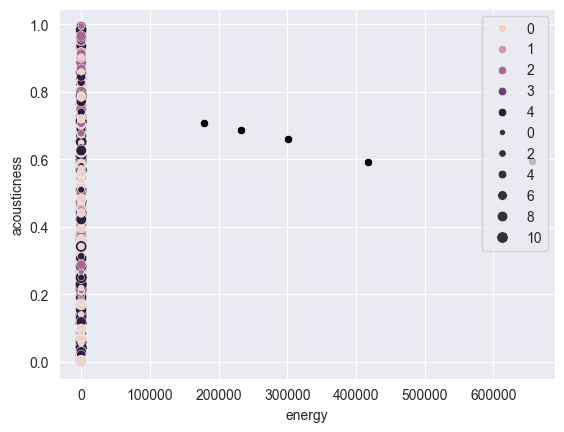

In [11]:
sns.scatterplot(data = X,  x="energy", y = "acousticness", size="key", hue = model.labels_)
sns.scatterplot(x=model.cluster_centers_[:, 0], y =model.cluster_centers_[:, 1], c = ['black'])